### Notebook 3_3

## State Space Model

#### Student Learning Outcomes
* Learn to represent the State Space Model
* Learn how to obtain the response of State Space Model in Python
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Matrix Operations in Numpy</h2>
</div>


**Create a matrix using numpy**

Use ```numpy.array```

For example, create such matrix $$P = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

In [2]:
# type matrix P
P = np.array([[1, 2], [3, 4]])
print(P)

[[1 2]
 [3 4]]


-------
**Matrix multiplication**

For example, create two matrices 

$$Q = \begin{bmatrix} 10 & 2 \\ 30 & 4 \end{bmatrix},\: R = \begin{bmatrix} 0.5 \\ 0.1 \end{bmatrix}$$


First Hand calculate their multiplication as:

$$Q R= \begin{bmatrix} 10 & 2 \\ 30 & 4 \end{bmatrix}\begin{bmatrix} 0.5 \\ 0.1 \end{bmatrix}=\begin{bmatrix} 10\cdot 0.5 + 2\cdot 0.1 \\ 30\cdot 0.5 + 4\cdot 0.1 \end{bmatrix}$$

$$Q R= \begin{bmatrix} 5.2 \\ 15.4 \end{bmatrix}$$

Then use the Python to check the calculation. Note, matrix multiplication is done by ```numpy.matmul``` or ```@``` operator, not directly using ```*``` operator. See https://numpy.org/doc/stable/reference/generated/numpy.matmul.html

In [4]:
## Fill the Python code
Q = np.array([[10, 2], [30, 4]])
R = np.array([[0.5], [0.1]])

## Then multiply and print out result
# use numpy.matmul or @ operator
print(Q@R)

[[ 5.2]
 [15.4]]


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Markdown result and Python printout: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Intro to State Space Model</h2>
</div>

In most of this course, we study **linear time-invariant (LTI) systems** using the **Transfer Function**:

**$$H(s) = \frac{Y(s)}{X(s)}$$**

This represetation works well for **single-input, single-output (SISO)** systems. However, in more complex cases—such as systems with  **multiple inputs and multiple outputs (MIMO)** —it will be hard for the Transfer Function to deal with.

To handle such systems, a new representation can use used. It is in **matrix-vector form** and is called the **state-space model**.

State-space model is a tech rising from 1960s and considered as a more "modern" approach compared to the traditional Transfer Function representation. 

One notable early usage is controlling the  Apollo 11 moon-landing flight in 1969. You can visit their code https://github.com/chrislgarry/Apollo-11 and search for the keyword ```STATE VECTOR```


-------------
There are many engineering problems that can be treated as MIMO systems. Let's use ChatGPT to check it.

> Ask the following 3 questions to ChatGPT.

```
* Is Autonomous Car a MIMO system in engineering? If so, what are the inputs and outputs? Answer in short.
* Is Aircraft Flight Control a MIMO system in engineering? If so, what are the inputs and outputs? Answer in short.
* Is HVAC Control a MIMO system in engineering? If so, what are the inputs and outputs? Answer in short.
```

Create a Markdown cell below and provide the answers in a clear format.

---

#### Autonomous Car

**Inputs:**  
- Steering angle  
- Acceleration/brake commands  
- Sensor data (e.g., LiDAR, cameras, GPS)

**Outputs:**  
- Vehicle position and velocity  
- Orientation (yaw, pitch, roll)  
- Obstacle proximity/status

---

#### Aircraft Flight Control

**Inputs:**  
- Control surface deflections (elevator, aileron, rudder)  
- Thrust commands  
- Sensor feedback (e.g., gyroscopes, accelerometers)

**Outputs:**  
- Aircraft orientation (pitch, roll, yaw)  
- Altitude and airspeed  
- Trajectory position (x, y, z coordinates)

---

#### HVAC Control

**Inputs:**  
- Heater/cooler power levels  
- Fan speeds  
- External temperature or humidity

**Outputs:**  
- Room temperatures  
- Air humidity levels  
- Airflow rates in different zones

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>MIMO answers: 1.5 pt</strong>
</span>

---------
Formally, a state-space mode is:

$$\begin{aligned}
\dot{\mathbf{x}}(t) &= A \mathbf{x}(t) + B \mathbf{u}(t) \\
\mathbf{y}(t) &= C \mathbf{x}(t) + D \mathbf{u}(t)
\end{aligned}$$

- The **input** is denoted by $\mathbf{u}(t)$,
- The **output** is denoted by $\mathbf{y}(t)$,
- And we introduce a new concept called the **state**, denoted by $\mathbf{x}(t)$.


Here suppose we have:
- $n$: number of **states**
- $m$: number of **inputs**
- $p$: number of **outputs**

| Vector/Matrix |       Name                           | Dimension   (row $\times$ column)|Description|    
|--------|------------------|------------------|------------------|
| $\mathbf{x}(t)$  | State vector                                     | $ n \times 1 $ | $n$ is the system's ODE order|
| $ \mathbf{u}(t)$  | Input vector                                     | $ m \times 1 $ | $m$ indicates how many inputs are there|
| $\mathbf{y}(t)$  | Output vector                                    | $ p \times 1 $ | $p$ indicates how many outputs are there|
| **A**  | State matrix                                     | $n \times n$ |represent how states affect each other
| **B**  | Input matrix                                     | $n \times m$ |represent how the inputs to the system affect the states
| **C**  | Output matrix                                    | $p \times n$ |represent the portions of the states that are measured by the outputs
| **D**  | Feedthrough matrix      | $p \times m$ |represent how the inputs directly affect the output without going thru the system

* The states $\mathbf{x}(t)$ in state-space models often represent physical quantities in the system.

* In entry-level system analysis, the matrix **D** is commonly set as zero.

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: SIMO system in State Space Model</h2>
</div>

-----------
Instead of diving into MIMO systems, let's start with simple systems -- SIMO systems (single-input multi-output).

(Note: in this course, we will only study SIMO. We won't go deep to MIMO.)

--------------
We start by reviewing the previous example in Notebook 1_3: using a pool stick to hit a ball

https://github.com/BotYue/ELE-251-25Sp-SU-Open/blob/main/Section%201/Notebook%201_3_key.ipynb

$$0.272\cdot \dfrac{dv(t)}{dt} + 0.12\cdot v(t) = F_{\mathrm{hit}}(t)$$

* Input is the **force that hits the ball**, $F_{\mathrm{hit}}(t)$

Previous we assume the output is just the velocity of the ball $v(t)$

Now we assume that we have an extra distance sensor that can measure the position of the ball.

* Output are the **position of the ball**, $p(t)$, and the **velocity of the ball**, $v(t)$ 

----------
Based on our problem setting, we can **start with defining vectors**:
* Input vector $ \mathbf{u}(t) = \begin{bmatrix} F_{\mathrm{hit}}(t) \end{bmatrix} $ 
* Output vector  $ \mathbf{y}(t) = \begin{bmatrix} p(t) \\ v(t) \end{bmatrix} $

Next, we choose state variables:
* $x_1(t) = p(t)$ (position)
* $x_2(t) = v(t)$ (velocity)
* State vector can be written as $ \mathbf{x}(t) = \begin{bmatrix} p(t) \\ v(t) \end{bmatrix} $
  
With such state variables, we can write **state equations** based on the problem setting, where the **highest order in each equation is 1**. 

------
**Then, write the state equations:**

$$\dot{x}_1(t) = \dfrac{dp(t)}{dt} = v(t) = x_2(t)$$

\begin{align*}
\dot{x}_2(t) = \frac{dv(t)}{dt} &= -\frac{0.12}{0.272} v(t) + \frac{1}{0.272} F_{\mathrm{hit}}(t) \\&= -\frac{0.12}{0.272} x_2(t) + \frac{1}{0.272} u(t)\\&= -0.441 x_2(t) + 3.68 u(t)
\end{align*}

-------
**Finally, write it in state-space form:**
$$\dot{x}(t) = \begin{bmatrix}\dot{x}_1(t) \\\dot{x}_2(t)\end{bmatrix}=\begin{bmatrix}x_2(t)\\-0.441 x_2(t) + 3.68 u(t)\end{bmatrix} = \underbrace{\begin{bmatrix}0 & 1 \\0 & -0.441\end{bmatrix}}_{A}x(t) +\underbrace{\begin{bmatrix}0 \\3.68\end{bmatrix}}_{B}u(t)$$

$$y(t) =\underbrace{\begin{bmatrix}1 & 0 \\0 & 1\end{bmatrix}}_{C}x(t) +\underbrace{\begin{bmatrix}0 \\0\end{bmatrix}}_{D}u(t)$$

--------
The state-space model can be typed into Python ```scipy.signal.lti```, then previous functions such as ```signal.impulse```, ```signal.step```, ```signal.lsim```, ... can all work on it.

Now it is your job to fill the code below. The code will define a state space model and then plot the unit impulse response of it.

Notice that your output vector is in 2 dimensions. So you need to plot each dimension separately.

<div style="border-left: 4px solid #FF0000; padding: 10px; background-color: #FFE5E5;">
<strong>[!CRITICAL]</strong> Type every numbers in A, B, C, D as float numbers, not int numbers. Otherwise Scipy may fail to generate response.
</div>

StateSpaceContinuous(
array([[ 0.   ,  1.   ],
       [ 0.   , -0.441]]),
array([[0.  ],
       [3.68]]),
array([[1., 0.],
       [0., 1.]]),
array([[0.],
       [0.]]),
dt: None
)


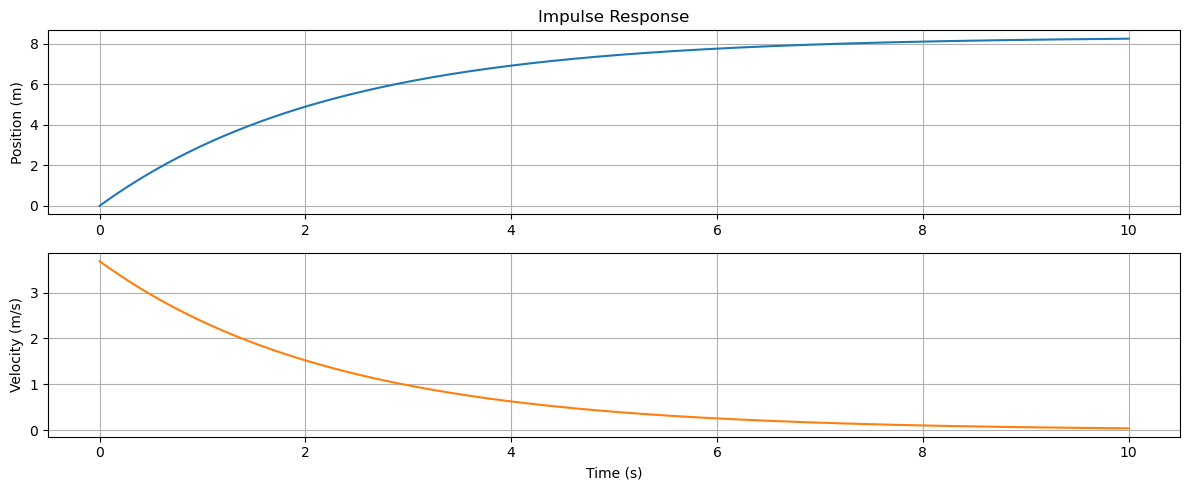

In [6]:
A = np.array([[0.0, 1.0], [0.0, -0.441]])
B = np.array([[0.0], [3.68]])
C = np.array([[1.0, 0.0], [0.0, 1.0]])
D = np.array([[0.0], [0.0]]) 
SSModel = sig.lti(A, B, C, D)
print(SSModel)

# Impulse Response
t = np.linspace(0, 10, 1000)
_, y_out = sig.impulse(SSModel, T=t)

# Plotting
plt.figure(figsize=(12, 5))
# Position subplot
plt.subplot(2, 1, 1)
plt.plot(t, y_out[:, 0], color="tab:blue")
plt.ylabel('Position (m)')
plt.title('Impulse Response')
plt.grid(True)

# Velocity subplot
plt.subplot(2, 1, 2)
plt.plot(t, y_out[:, 1], color="tab:orange")
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.grid(True)

plt.tight_layout()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Finish code and plot: 2.5 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


